<a href="https://colab.research.google.com/github/chyan0411/Thesis/blob/master/run_file3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install import-ipynb
import import_ipynb
import numpy as np
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model,Sequential 
# from keras import 
from keras import Input,layers,optimizers
from keras.layers import Input, Dense, Flatten
from sklearn.utils import shuffle
from keras.layers.merge import concatenate 
from keras.applications import VGG16, InceptionV3, MobileNet, ResNet50, DenseNet121
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input 
from keras.applications.inception_v3 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.applications.resnet import preprocess_input
from keras.applications.densenet import preprocess_input
from google.colab import drive
from keras.utils.vis_utils import plot_model
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
from model_functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


(24, 30, 116, 116)
(116, 116)


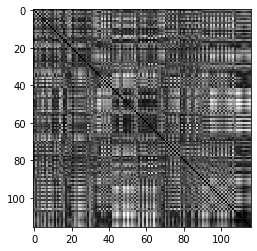

In [ ]:


a = np.load('/content/drive/My Drive/input/fu/10.npy')
print(a.shape)
b = a[0,0,:,:]
print(b.shape)
# tmp=tmp.astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(b,cmap='gray')

In [ ]:
a = np.load('/content/drive/My Drive/ready_data_6C/matrix_input/1.npy')   # (96, 6, 116, 116)
Label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')  #(96, 3)
b = np.load('/content/drive/My Drive/ready_data_6C/input/1.npy')   #(96, 6, 6786)

print(a.shape)
print(Label.shape)
print(b.shape)


  


(96, 6, 116, 116)
(96, 3)
(96, 6, 6786)


In [ ]:
print(Label[0,:])
Label = Label[:,:] * 100
print(Label[0,:])

[0. 0. 1.]
[  0.   0. 100.]


In [ ]:
def sixtothree_matrix(all_data):   #把 6个频道变成3个频道 

  L = []
  for i in range(96):
    New = []

    Delta = 0

    alfa = 0

    Beta = 0
    for j in range(0,2):
      Delta = Delta + all_data[i,j,:,:]
    Delta = Delta/2

    for j in range(2,4):
      alfa = alfa + all_data[i,j,:,:]
    alfa = alfa/2
 
    for j in range(4,6):
      Beta = Beta + all_data[i,j,:,:]
    Beta = Beta/2
    New.append(Delta)

    New.append(alfa)

    New.append(Beta)

    L.append(New)
  New = np.array(L)
  return New

def sixtothree_half_size(all_data):

  L = []
  for i in range(96):
    New = []

    Delta = 0

    alfa = 0

    Beta = 0
    for j in range(0,2):
      Delta = Delta + all_data[i,j,:]
    Delta = Delta/2

    for j in range(2,4):
      alfa = alfa + all_data[i,j,:]
    alfa = alfa/2
 
    for j in range(4,6):
      Beta = Beta + all_data[i,j,:]
    Beta = Beta/2
    New.append(Delta)

    New.append(alfa)

    New.append(Beta)

    L.append(New)
  New = np.array(L)
  return New

In [ ]:
tmp = sixtothree_matrix(a)
tmp = np.reshape(tmp, (96,116,116,3)) #变成 length,width, cns 标准 3d图像
input_data = sixtothree_half_size(b) 
print(tmp.shape)
print(input_data.shape)

(96, 116, 116, 3)
(96, 3, 6786)


In [ ]:
def data(input_data1,input_data2, split): 
  
  input_data1, input_data2,label = shuffle(input_data1, input_data2, Label)    #打乱 取split数量做trainning  
  # split = 52
  train_data1 = input_data1[:split]
  train_label = label[:split]
  test_data1 = input_data1[split:]
  test_label = label[split:]  
  train_data2 = input_data2[:split]
  test_data2 = input_data2[split:]
    
  train_data21=train_data2[:,0,:]
  train_data22=train_data2[:,1,:]
  train_data23=train_data2[:,2,:]

  return train_data1,train_label,test_data1,test_label,train_data21,train_data22,train_data23, test_data2 



In [ ]:
train_data1,train_label,test_data1,test_label,train_data21,train_data22,train_data23, test_data2 = data(tmp,input_data,72)

In [ ]:
print(train_data1.shape)
print(train_label.shape)
print(test_data1.shape)
print(test_label.shape)
print(train_data21.shape)
print(train_data22.shape)
print(train_data23.shape)

(72, 116, 116, 3)
(72, 3)
(24, 116, 116, 3)
(24, 3)
(72, 6786)
(72, 6786)
(72, 6786)


# 从这里开始

In [2]:
def sixtothree_matrix(all_data):   #把 6个频道变成3个频道 
  L = []
  for i in range(150):
    New = []

    Delta = 0

    alfa = 0

    Beta = 0
    for j in range(0,2):
      Delta = Delta + all_data[i,j,:,:]
    Delta = Delta/2

    for j in range(2,4):
      alfa = alfa + all_data[i,j,:,:]
    alfa = alfa/2
 
    for j in range(4,6):
      Beta = Beta + all_data[i,j,:,:]
    Beta = Beta/2
    New.append(Delta)

    New.append(alfa)

    New.append(Beta)

    L.append(New)
  New = np.array(L)
  return New

In [3]:
data = []
label2 = []
label3 = []
for i in range(1,25):
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/150_6_116_116_' + str(i) +'_flipped.npy')
  b = sixtothree_matrix(a)
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i) + '.npy')  #两个label
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/percent_output_' + str(i) + '.npy')  #三个label
  data.append(b)
  label2.append(c)
  label3.append(d)

In [4]:
Data, Label2, Label3 = shuffle(data, label2, label3, random_state = 20)


In [5]:
P = np.array(Data)
P = np.reshape(P,(3600,116,116,3))

L2 = np.array(Label2)
L2 = np.reshape(L2,(3600,2))

L3 = np.array(Label3)
L3 = np.reshape(L3,(3600,3))
print(P.shape)
print(L2.shape)
print(L3.shape)
#输入数据
train_data = P[:2700]  
test_data = P[2700:]

(3600, 116, 116, 3)
(3600, 2)
(3600, 3)


In [ ]:
# 2 label
train_label  = L2[:2700]
test_label = L2[2700:]


print(train_data.shape)
print(train_label.shape)

(2700, 116, 116, 3)
(2700, 2)


In [6]:
# 3 label
train_label  = L3[:2700]
test_label = L3[2700:]

print(train_data.shape)
print(train_label.shape)

(2700, 116, 116, 3)
(2700, 3)


In [7]:
train_data, train_label = shuffle(train_data, train_label, random_state = 20)

In [8]:
# count = 0
# for i in range(24):
#   for j in range(150):
#     # if Label3[i,j,0] + Label3[i,j,1] + Label3[i,j,2]  == 1:
#     if L3[i,j,0] + L3[i,j,1] + L3[i,j,2]  == 1:
#       count+=1
# print(count)

count = 0
for i in range(3600):
    if L3[i,0] + L3[i,1] + L3[i,2]  == 1:
      count+=1
print(count)

# print(L3)

3600


In [ ]:
# from model_functions import *
# model = ZF_Net()
# model1 = VGG16()
# model2 = ResNet50()
# model3 = Xception()
# model4 = DenseNet121()
# model5 = MobileNet()
# model6 = get_model9()


# function组 

In [ ]:
def ZF_Net():
    # model = models.Sequential()
    model = Sequential()  
    initializer = tf.keras.initializers.Zeros()
    model.add(Conv2D(32,(3,3),strides=(1,1),input_shape=(116,116,3),padding='valid',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer)) 
    # model.add(Dropout(0.5)) 
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Dropout(0.5))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='valid',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Dropout(0.5))
    # model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(MaxPooling2D(pool_size=(2,2)))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='valid',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(MaxPooling2D(pool_size=(2,2)))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    # model.add(Dropout(0.5))
    # model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer=initializer))  
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Flatten())  
    # model.add(Dense(4096,activation='relu'))  
    # model.add(Dropout(0.5))  
    # model.add(Dense(4096,activation='relu'))  
    # model.add(Dropout(0.5))  
    # model.add(Dense(2000,activation='relu'))  
    # model.add(Dropout(0.5)) 
    model.add(Dense(100,activation='relu'))  
    model.add(Dropout(0.5)) 
    # model.add(Dense(512,activation='relu'))  
    # model.add(Dropout(0.5)) 
    # model.add(Dense(200,activation='relu'))  
    # model.add(Dropout(0.5)) 
    # model.add(Dense(100,activation='relu'))  
    # model.add(Dropout(0.5)) 
    # model.add(Dense(3,activation='softmax'))  
    model.add(Dense(3))
    model.summary()
    from keras.optimizers import RMSprop,Adam,SGD
    model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])

    return model




In [ ]:
def V16():
  from keras.applications.vgg16 import VGG16
  from keras.preprocessing import image
  from keras.applications.vgg16 import preprocess_input 
  initializer = tf.keras.initializers.Zeros()
  # model = VGG16(weights='imagenet', include_top=False) 
  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(116,116,3))
  x = conv_base.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu',kernel_initializer= initializer)(x)
  x = Dense(512, activation='relu',kernel_initializer= initializer)(x)  
  # x = Dense(256, activation='relu')(x) 
  # x = Dense(128, activation='relu')(x) 
  # x = Dense(64, activation='relu')(x)
  # x = Dense(3, activation='softmax')(x) 
  x = Dense(3, kernel_initializer= initializer)(x) 

  model = Model(inputs=conv_base.input, outputs=x)
#首先，我们只训练顶部的几层（随机初始化的层）
  # for layer in conv_base.layers:
  #   layer.trainable = False
  model.summary()
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  
  return model
  



In [62]:
def ResNet50(): #训练集 效果较好

  from keras.applications.resnet50 import ResNet50
  from keras.preprocessing import image
  from keras.applications.resnet50 import preprocess_input
  initializer = tf.keras.initializers.Zeros()
  # model = VGG16(weights='imagenet', include_top=False) 
  conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(116, 116, 3))
  x = conv_base.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)  
  # x = Dense(256, activation='relu')(x) 
  # x = Dense(128, activation='relu')(x) 
  # x = Dense(64, activation='relu')(x)
  # x = Dense(3, activation='softmax')(x) 
  # x = Dense(3, kernel_initializer=initializer,activation='sigmoid')(x) 
  x = Dense(3, kernel_initializer=initializer)(x) 

  model = Model(inputs=conv_base.input, outputs=x)
# 首先，我们只训练顶部的几层（随机初始化的层）
  # for layer in conv_base.layers:
  #   layer.trainable = False
  model.summary()
  plot_model(model, to_file='/content/drive/My Drive/images/resnet50.png', show_shapes=True, show_layer_names=True)
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = RMSprop(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model
  
  





In [ ]:
def Xception():

  from keras.applications.xception import Xception
  from keras.preprocessing import image
  from keras.applications.xception  import preprocess_input
  initializer = tf.keras.initializers.Zeros()
  # model = VGG16(weights='imagenet', include_top=False) 
  conv_base = Xception(weights='imagenet', include_top=False, input_shape=(116, 116, 3))
  x = conv_base.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)  
  # x = Dense(256, activation='relu')(x) 
  # x = Dense(128, activation='relu')(x) 
  # x = Dense(64, activation='relu')(x)
  # x = Dense(3, activation='softmax')(x)
  x = Dense(3, kernel_initializer=initializer)(x) 

  model = Model(inputs=conv_base.input, outputs=x)
# 首先，我们只训练顶部的几层（随机初始化的层）
  # for layer in conv_base.layers:
  #   layer.trainable = False
  model.summary()
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model


In [ ]:
def DenseNet121():

  from keras.applications.densenet import DenseNet121
  from keras.preprocessing import image
  from keras.applications.densenet import preprocess_input
  initializer = tf.keras.initializers.Zeros()
  # model = VGG16(weights='imagenet', include_top=False) 
  conv_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(116, 116, 3))
  x = conv_base.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)  
  # x = Dense(256, activation='relu')(x) 
  # x = Dense(128, activation='relu')(x) 
  # x = Dense(64, activation='relu')(x)
  # x = Dense(3, activation='softmax')(x) 
  x = Dense(3, kernel_initializer=initializer)(x) 

  model = Model(inputs=conv_base.input, outputs=x)
  model.summary()
# 首先，我们只训练顶部的几层（随机初始化的层）
  # for layer in conv_base.layers:
  #   layer.trainable = False
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model

In [ ]:
def MobileNet(): #效果也不错

  from keras.applications.mobilenet import MobileNet
  from keras.preprocessing import image
  from keras.applications.mobilenet  import preprocess_input
  # model = VGG16(weights='imagenet', include_top=False) 
  initializer = tf.keras.initializers.Zeros()
  conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(116, 116, 3))
  x = conv_base.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)  
  # x = Dense(256, activation='relu')(x) 
  # x = Dense(128, activation='relu')(x) 
  # x = Dense(64, activation='relu')(x)
  # x = Dense(3, activation='softmax')(x) 
  x = Dense(3, kernel_initializer=initializer, activation='sigmoid')(x) 

  model = Model(inputs=conv_base.input, outputs=x)
# 首先，我们只训练顶部的几层（随机初始化的层）
  # for layer in conv_base.layers:
  #   layer.trainable = False
  model.summary()
  from keras.optimizers import RMSprop,Adam,SGD
  model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model

In [22]:
def luanxie():

    initializer = tf.keras.initializers.glorot_uniform(seed = 0)
    input = Input(shape=(116,116,3), name="img")
    x = layers.Conv2D(32, 3, activation="relu", kernel_initializer=initializer)(input)
    x = layers.Conv2D(64, 3, activation="relu",kernel_initializer=initializer)(x)
    output1 = layers.MaxPooling2D(2)(x)

    
    x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(output1)
    # x = layers.GlobalAveragePooling2D()(x)
    x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    # x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    output2 = layers.add([x, output1])

    x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(output2)
    # x = layers.GlobalAveragePooling2D()(x)
    x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    # x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)

    output3 = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(output2)
    output3 = layers.add([x, output3])
    output3 = layers.MaxPooling2D(2)(output3)

    x = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(output3)
    # x = layers.GlobalAveragePooling2D()(x)
    x = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    # x = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(128, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    output4 = layers.add([x, output3])

    x = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(output4)
    # x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)

    output5 = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(output4)
    output5 = layers.add([x, output5])
    output5 = layers.MaxPooling2D(2)(output5)

    x = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(output5)
    # x = layers.Conv2D(64, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(256, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)
    x = layers.Conv2D(512, 3, activation="relu",padding="same",kernel_initializer=initializer)(x)

    output5 = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(output5)
    x = layers.Dense(1024, activation="relu",kernel_initializer=initializer)(x)
    x = layers.Dense(2046, activation="relu",kernel_initializer=initializer)(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(3)(x)

    model = Model(inputs= input, outputs= output)
  # 首先，我们只训练顶部的几层（随机初始化的层）
    # for layer in conv_base.layers:
    #   layer.trainable = False
    model.summary()
    from keras.optimizers import RMSprop,Adam,SGD
    model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                  loss = 'mean_squared_error',
                  metrics = ['mae'])
 
    return model

In [59]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# Author:ZhengzhengLiu
 
#构建50层的ResNet神经网络实现图像的分类
#深度学习框架 Keras中实现
 
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,\
    BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from keras.models import Model,load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import pydoc
from IPython.display import SVG
# from resnets_utils import *
import scipy.misc
from matplotlib.pyplot import imshow
 
import keras.backend as K
K.set_image_data_format("channels_last")
K.set_learning_phase(1)
 
#恒等模块——identity_block
def identity_block(X,f,filters,stage,block):
    """
    三层的恒等残差块
    param :
    X -- 输入的张量，维度为（m, n_H_prev, n_W_prev, n_C_prev）
    f -- 整数，指定主路径的中间 CONV 窗口的形状
    filters -- python整数列表，定义主路径的CONV层中的过滤器数目
    stage -- 整数，用于命名层，取决于它们在网络中的位置
    block --字符串/字符，用于命名层，取决于它们在网络中的位置
    return:
    X -- 三层的恒等残差块的输出，维度为：(n_H, n_W, n_C)
    """
    #定义基本的名字
    conv_name_base = "res"+str(stage)+block+"_branch"
    bn_name_base = "bn"+str(stage)+block+"_branch"
 
    #过滤器
    F1,F2,F3 = filters
 
    #保存输入值,后面将需要添加回主路径
    X_shortcut = X
 
    #主路径第一部分
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(1,1),padding="valid",
               name=conv_name_base+"2a",kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2a")(X)
    X = Activation("relu")(X)
 
    # 主路径第二部分
    X = Conv2D(filters=F2,kernel_size=(f,f),strides=(1,1),padding="same",
               name=conv_name_base+"2b",kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2b")(X)
    X = Activation("relu")(X)
 
    # 主路径第三部分
    X = Conv2D(filters=F3,kernel_size=(1,1),strides=(1,1),padding="valid",
               name=conv_name_base+"2c",kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2c")(X)
 
    # 主路径最后部分,为主路径添加shortcut并通过relu激活
    X = layers.add([X,X_shortcut])
    X = Activation("relu")(X)
 
    return X
 
# tf.reset_default_graph()
# with tf.Session() as sess:
#     np.random.seed(1)
#     A_prev = tf.placeholder("float",shape=[3,4,4,6])
#     X = np.random.randn(3,4,4,6)
#     A = identity_block(A_prev,f=2,filters=[2,4,6],stage=1,block="a")
#     sess.run(tf.global_variables_initializer())
#     out = sess.run([A],feed_dict={A_prev:X,K.learning_phase():0})
#     print("out = "+str(out[0][1][1][0]))
 
#卷积残差块——convolutional_block
def convolutional_block(X,f,filters,stage,block,s=2):
    """
    param :
    X -- 输入的张量，维度为（m, n_H_prev, n_W_prev, n_C_prev）
    f -- 整数，指定主路径的中间 CONV 窗口的形状（过滤器大小，ResNet中f=3）
    filters -- python整数列表，定义主路径的CONV层中过滤器的数目
    stage -- 整数，用于命名层，取决于它们在网络中的位置
    block --字符串/字符，用于命名层，取决于它们在网络中的位置
    s -- 整数，指定使用的步幅
    return:
    X -- 卷积残差块的输出，维度为：(n_H, n_W, n_C)
    """
    # 定义基本的名字
    conv_name_base = "res" + str(stage) + block + "_branch"
    bn_name_base = "bn" + str(stage) + block + "_branch"
 
    # 过滤器
    F1, F2, F3 = filters
 
    # 保存输入值,后面将需要添加回主路径
    X_shortcut = X
 
    # 主路径第一部分
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding="valid",
               name=conv_name_base + "2a", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + "2a")(X)
    X = Activation("relu")(X)
 
    # 主路径第二部分
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding="same",
               name=conv_name_base + "2b", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + "2b")(X)
    X = Activation("relu")(X)
 
    # 主路径第三部分
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding="valid",
               name=conv_name_base + "2c", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + "2c")(X)
 
    #shortcut路径
    X_shortcut = Conv2D(filters=F3,kernel_size=(1,1),strides=(s,s),padding="valid",
               name=conv_name_base+"1",kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3,name=bn_name_base+"1")(X_shortcut)
 
    # 主路径最后部分,为主路径添加shortcut并通过relu激活
    X = layers.add([X, X_shortcut])
    X = Activation("relu")(X)
 
    return X
 
# tf.reset_default_graph()
 
# with tf.Session() as test:
#     np.random.seed(1)
#     A_prev = tf.placeholder("float", [3, 4, 4, 6])
#     X = np.random.randn(3, 4, 4, 6)
#     A = convolutional_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
#     test.run(tf.global_variables_initializer())
#     out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
#     print("out = " + str(out[0][1][1][0]))
 
#50层ResNet模型构建
def ResNet500(input_shape = (116,116,3),classes = 6):
    """
    构建50层的ResNet,结构为：
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    param :
    input_shape -- 数据集图片的维度
    classes -- 整数，分类的数目
    return:
    model -- Keras中的模型实例
    """
    #将输入定义为维度大小为 input_shape的张量
    input = Input(input_shape)
 
    # Zero-Padding
    X = ZeroPadding2D((3,3))(input)
 
    # Stage 1
    X = Conv2D(64,kernel_size=(7,7),strides=(2,2),name="conv1",kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name="bn_conv1")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D(pool_size=(3,3),strides=(2,2))(X)
 
    # Stage 2
    X = convolutional_block(X,f=3,filters=[64,64,256],stage=2,block="a",s=1)
    X = identity_block(X,f=3,filters=[64,64,256],stage=2,block="b")
    X = identity_block(X,f=3,filters=[64,64,256],stage=2,block="c")
 
    #Stage 3
    X = convolutional_block(X,f=3,filters=[128,128,512],stage=3,block="a",s=2)
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block="b")
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block="c")
    X = identity_block(X,f=3,filters=[128,128,512],stage=3,block="d")
 
    # Stage 4
    X = convolutional_block(X,f=3,filters=[256,256,1024],stage=4,block="a",s=2)
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block="b")
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block="c")
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block="d")
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block="e")
    X = identity_block(X,f=3,filters=[256,256,1024],stage=4,block="f")
 
    #Stage 5
    X = convolutional_block(X,f=3,filters=[512,512,2048],stage=5,block="a",s=2)
    X = identity_block(X,f=3,filters=[256,256,2048],stage=5,block="b")
    X = identity_block(X,f=3,filters=[256,256,2048],stage=5,block="c")
 
    #最后阶段
    #平均池化
    # X = AveragePooling2D(pool_size=(2,2))(X)
 
    #输出层
    X = Flatten()(X)    #展平
    X = Dense(1024,activation="relu", kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(512,activation="relu", kernel_initializer=glorot_uniform(seed=0))(X) 
    X = Dense(3, kernel_initializer=glorot_uniform(seed=0))(X)
 
    #创建模型
    model = Model(inputs=input,outputs=X,name="ResNet500")
    model.summary()
    plot_model(model, to_file='/content/drive/My Drive/images/resnet500.png', show_shapes=True, show_layer_names=True)
    from keras.optimizers import RMSprop,Adam,SGD
    model.compile(optimizer = SGD(learning_rate=0.0001, momentum=0.9),
                  loss = 'mean_squared_error',
                  metrics = ['mae'])
    return model
 
# #运行构建的模型图
# model = ResNet50(input_shape=(64,64,3),classes=6)
 
# #编译模型来配置学习过程
# model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
 
# #加载数据集
# X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
 
# # Normalize image vectors
# X_train = X_train_orig/255.
# X_test = X_test_orig/255.
 
# # Convert training and test labels to one hot matrices
# Y_train = convert_to_one_hot(Y_train_orig, 6).T
# Y_test = convert_to_one_hot(Y_test_orig, 6).T
 
# print ("number of training examples = " + str(X_train.shape[0]))
# print ("number of test examples = " + str(X_test.shape[0]))
# print ("X_train shape: " + str(X_train.shape))
# print ("Y_train shape: " + str(Y_train.shape))
# print ("X_test shape: " + str(X_test.shape))
# print ("Y_test shape: " + str(Y_test.shape))
 
# #训练模型
# model.fit(X_train,Y_train,epochs=20,batch_size=32)
 
# #测试集性能测试
# preds = model.evaluate(X_test,Y_test)
# print("Loss = "+str(preds[0]))
# print("Test Accuracy ="+str(preds[1]))si

In [63]:
# model = ZF_Net()
# model1 = V16()
model2 = ResNet50()
# model2 = ResNet500()
# model3 = Xception()
# model4 = DenseNet121()
# model5 = MobileNet()
# model6 = luanxie()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 116, 116, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 122, 122, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 58, 58, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 58, 58, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [50]:
num_epochs = 75
batchsize = 128

# history = model.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
# history1 = model1.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
history2 = model2.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
# history3 = model3.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
# history4 = model4.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
# history5 = model5.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)
# history6 = model6.fit(train_data, train_label, epochs=num_epochs,batch_size=batchsize,verbose= 1)


Epoch 1/75
22/22 [==============================] - 5s 206ms/step - loss: 0.0309 - mae: 0.1270
Epoch 2/75
22/22 [==============================] - 4s 202ms/step - loss: 0.0038 - mae: 0.0448
Epoch 3/75
22/22 [==============================] - 4s 202ms/step - loss: 0.0023 - mae: 0.0353
Epoch 4/75
22/22 [==============================] - 4s 202ms/step - loss: 0.0016 - mae: 0.0280
Epoch 5/75
22/22 [==============================] - 4s 202ms/step - loss: 0.0012 - mae: 0.0261
Epoch 6/75
22/22 [==============================] - 4s 202ms/step - loss: 7.8098e-04 - mae: 0.0213
Epoch 7/75
22/22 [==============================] - 4s 202ms/step - loss: 5.8945e-04 - mae: 0.0177
Epoch 8/75
22/22 [==============================] - 4s 202ms/step - loss: 0.0011 - mae: 0.0241
Epoch 9/75
22/22 [==============================] - 4s 202ms/step - loss: 5.4447e-04 - mae: 0.0176
Epoch 10/75
22/22 [==============================] - 4s 202ms/step - loss: 4.8251e-04 - mae: 0.0163
Epoch 11/75
22/22 [==============

In [51]:
ttt = range(299,301)
m2 = model2.predict(train_data[ttt])
# m5 = model5.predict(train_data[ttt])
# print(train_data[0].shape)
print(train_label[ttt])
print(m2)
# print(m5)

[[0.39002268 0.00907029 0.60090703]
 [0.47165533 0.16099773 0.36734694]]
[[0.36300746 0.02418076 0.55351806]
 [0.43039185 0.15200482 0.3543882 ]]


Text(0, 0.5, 'Loss & MAE')

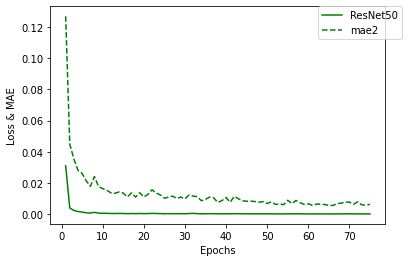

In [52]:


# mse = history.history['loss'] 
# mae = history.history['mae']
# mse1 = history1.history['loss']
# mae1 = history1.history['mae']
mse2 = history2.history['loss']
mae2 = history2.history['mae']
# mse3 = history3.history['loss']
# mae3 = history3.history['mae']
# mse4 = history4.history['loss']
# mae4 = history4.history['mae']
# mse5 = history5.history['loss']
# mae5 = history5.history['mae']


# model = ZF_Net()
# model1 = VGG16()
# model2 = ResNet50()
# model3 = Xception()
# model4 = DenseNet121()
# model5 = MobileNet()
# model6 = get_model9()

epochs = range(1,len(mse2) +1)
# plt.plot(epochs, mse, 'b', label='Proposed Net')
# plt.plot(epochs, mae, 'b--', label='mae')
# plt.plot(epochs, mse1, 'r', label='VGG16')
# plt.plot(epochs, mae1, 'r--', label='mae1')
plt.plot(epochs, mse2, 'g', label='ResNet50')
plt.plot(epochs, mae2, 'g--', label='mae2')
# plt.plot(epochs, mse3, 'c', label='Xception')
# plt.plot(epochs, mae3, 'c--', label='mae3')
# plt.plot(epochs, mse4, 'm', label='DenseNet121')
# plt.plot(epochs, mae4, 'm--', label='mae4')
# plt.plot(epochs, mse5, 'y', label='MobileNet')
# plt.plot(epochs, mae5, 'y--', label='mae5')


plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Epochs')
plt.ylabel('Loss & MAE')
# plt.show() 
# plt.savefig('/content/drive/My Drive/images/pretrained_models_3_wo.png' ,dpi=1200)

# 预测值

In [53]:

# 这部分就是各个模型在测试集的表现
newx = test_data 
# m = model.predict(newx) * 100
# m1 = model1.predict(newx) * 100
m2 = model2.predict(newx) * 100
# m3 = model3.predict(newx) * 100
# m4 = model4.predict(newx) * 100
# m5 = model5.predict(newx) * 100
# print(m1.shape)
# m = np.reshape(m,(24,3))
# m1 = np.reshape(m1,(24,3))
# m2 = np.reshape(m2,(24,3))
# m3 = np.reshape(m3,(24,3))
# m4 = np.reshape(m4,(24,3))
# m5 = np.reshape(m5,(24,3))


In [54]:
# m = model2.predict(train_data[200:201])
tttt = range(599,601)
print(test_label[tttt])
print(m2[tttt])
# print(m5[tttt])
# print(m)

[[0.40136054 0.03628118 0.56235828]
 [0.34240363 0.07709751 0.58049887]]
[[36.92873   11.80852   44.02139  ]
 [38.802483   6.8815174 49.321136 ]]


In [55]:
# r = r2_score(test_label, m/100, multioutput='raw_values')
# r1 = r2_score(test_label, m1/100, multioutput='raw_values')
r2 = r2_score(test_label, m2/100, multioutput='raw_values')
r22 = r2_score(train_label, model2.predict(train_data), multioutput='raw_values')
# r3 = r2_score(test_label, m3/100, multioutput='raw_values')
# r4 = r2_score(test_label, m4/100, multioutput='raw_values')
# r5 = r2_score(test_label, m5/100, multioutput='raw_values')
print(r22)
print(r2)

[0.93726408 0.94366809 0.91999936]
[-0.05533916 -0.47131944 -8.0377553 ]


# 3个label

In [ ]:
c1 = test_label[:,0] * 100# 对测试集的真实数值c1进行大小排列  
c2 = test_label[:,1] * 100# 对测试集的真实数值c2进行大小排列
c3 = test_label[:,2] * 100# 对测试集的真实数值c3进行大小排列

# print(y_data_c1)

index1 = np.argsort(c1) #c1提取出按照从小到大的对应index
index2 = np.argsort(c2)   #c2提取出按照从小到大的对应index
index3 = np.argsort(c3)  #c3提取出按照从小到大的对应index 

c1.sort()
c2.sort()
c3.sort()
# print(index1)

yc1 = []
yc2 = []
yc3 = []
y1c1 = []
y1c2 = []
y1c3 = []
y2c1 = []
y2c2 = []
y2c3 = []
y3c1 = []
y3c2 = []
y3c3 = []
y4c1 = []
y4c2 = []
y4c3 = []
y5c1 = []
y5c2 = []
y5c3 = []

for i in range(900):
  yc1.append([m[i,0],index1[i]])
  yc2.append([m[i,1],index2[i]])
  yc3.append([m[i,2],index3[i]])
  y1c1.append([m1[i,0],index1[i]])
  y1c2.append([m1[i,1],index2[i]])
  y1c3.append([m1[i,2],index3[i]])
  y2c1.append([m2[i,0],index1[i]])
  y2c2.append([m2[i,1],index2[i]])
  y2c3.append([m2[i,2],index3[i]])
  y3c1.append([m3[i,0],index1[i]])
  y3c2.append([m3[i,1],index2[i]])
  y3c3.append([m3[i,2],index3[i]])
  y4c1.append([m4[i,0],index1[i]])
  y4c2.append([m4[i,1],index2[i]])
  y4c3.append([m4[i,2],index3[i]])
  y5c1.append([m5[i,0],index1[i]])
  y5c2.append([m5[i,1],index2[i]])
  y5c3.append([m5[i,2],index3[i]])

yc1.sort(key = lambda x: x[1]) 
yc2.sort(key = lambda x: x[1])
yc3.sort(key = lambda x: x[1])
y1c1.sort(key = lambda x: x[1]) 
y1c2.sort(key = lambda x: x[1])
y1c3.sort(key = lambda x: x[1])
y2c1.sort(key = lambda x: x[1]) 
y2c2.sort(key = lambda x: x[1])
y2c3.sort(key = lambda x: x[1])
y3c1.sort(key = lambda x: x[1]) 
y3c2.sort(key = lambda x: x[1])
y3c3.sort(key = lambda x: x[1])
y4c1.sort(key = lambda x: x[1]) 
y4c2.sort(key = lambda x: x[1])
y4c3.sort(key = lambda x: x[1])
y5c1.sort(key = lambda x: x[1]) 
y5c2.sort(key = lambda x: x[1])
y5c3.sort(key = lambda x: x[1])  





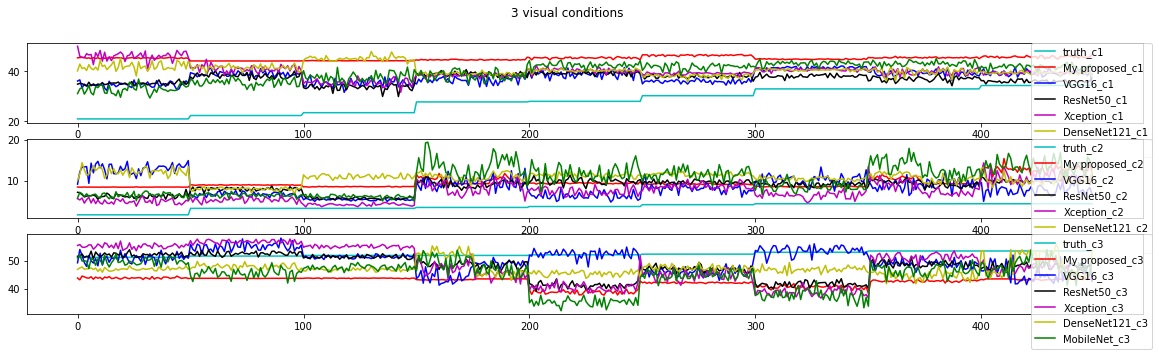

In [ ]:
samples = 450
x_data = range(samples)
# y_data_c1 = test_label[:,0]  
# y_data_c2 = test_label[:,1]
# y_data_c3 = test_label[:,2]

yc1 = np.array(yc1)
yc2 = np.array(yc2)
yc3 = np.array(yc3)
y1c1 = np.array(y1c1)
y1c2 = np.array(y1c2)
y1c3 = np.array(y1c3)
y2c1 = np.array(y2c1)
y2c2 = np.array(y2c2)
y2c3 = np.array(y2c3)
y3c1 = np.array(y3c1)
y3c2 = np.array(y3c2)
y3c3 = np.array(y3c3)
y4c1 = np.array(y4c1)
y4c2 = np.array(y4c2)
y4c3 = np.array(y4c3)
y5c1 = np.array(y5c1)
y5c2 = np.array(y5c2)
y5c3 = np.array(y5c3)

# y_predict_c1 = m[:,0]
# y_predict_c2 = m[:,1]
# y_predict_c3 = m[:,2]
# y_predict1_c1 = m1[:,0]
# y_predict1_c2 = m1[:,1]
# y_predict1_c3 = m1[:,2]
# y_predict2_c1 = m2[:,0]
# y_predict2_c2 = m2[:,1]
# y_predict2_c3 = m2[:,2]
# y_predict3_c1 = m3[:,0]
# y_predict3_c2 = m3[:,1]
# y_predict3_c3 = m3[:,2]
# y_predict4_c1 = m4[:,0]
# y_predict4_c2 = m4[:,1]
# y_predict4_c3 = m4[:,2]
# y_predict5_c1 = m5[:,0]
# y_predict5_c2 = m5[:,1]
# y_predict5_c3 = m5[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(20,5))
fig.suptitle('3 visual conditions')


predict_c1.plot(x_data, c1[:samples] , 'c', label='truth_c1')
predict_c2.plot(x_data, c2[:samples] , 'c', label='truth_c2')
predict_c3.plot(x_data, c3[:samples] , 'c', label='truth_c3')
predict_c1.plot(x_data, yc1[:samples,0] , 'r', label='My proposed_c1')
predict_c2.plot(x_data, yc2[:samples,0], 'r', label='My proposed_c2')
predict_c3.plot(x_data, yc3[:samples,0], 'r', label='My proposed_c3')
predict_c1.plot(x_data, y1c1[:samples,0] , 'b', label='VGG16_c1')
predict_c2.plot(x_data, y1c2[:samples,0] , 'b', label='VGG16_c2')
predict_c3.plot(x_data, y1c3[:samples,0] , 'b', label='VGG16_c3')
predict_c1.plot(x_data, y2c1[:samples,0] , 'k', label='ResNet50_c1')
predict_c2.plot(x_data, y2c2[:samples,0] , 'k', label='ResNet50_c2')
predict_c3.plot(x_data, y2c3[:samples,0] , 'k', label='ResNet50_c3')
predict_c1.plot(x_data, y3c1[:samples,0] , 'm', label='Xception_c1')
predict_c2.plot(x_data, y3c2[:samples,0] , 'm', label='Xception_c2')
predict_c3.plot(x_data, y3c3[:samples,0] , 'm', label='Xception_c3')
predict_c1.plot(x_data, y4c1[:samples,0] , 'y', label='DenseNet121_c1')
predict_c2.plot(x_data, y4c2[:samples,0] , 'y', label='DenseNet121_c2')
predict_c3.plot(x_data, y4c3[:samples,0] , 'y', label='DenseNet121_c3')
predict_c1.plot(x_data, y5c1[:samples,0] , 'g', label='MobileNet_c1')
predict_c2.plot(x_data, y5c2[:samples,0] , 'g', label='MobileNet_c2')
predict_c3.plot(x_data, y5c3[:samples,0] , 'g', label='MobileNet_c3')


predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)


# plt.plot(x_data, y_data_c1 , 'c', label='c1')
# plt.plot(x_data, y_data_c2 , 'r', label='c2')
# plt.plot(x_data, y_data_c3 , 'b', label='c3')
# plt.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# plt.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# plt.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# plt.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# plt.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# plt.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# plt.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# plt.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# plt.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

# plt.legend(loc="upper right",fontsize = 'small',bbox_to_anchor=(0.5, -0.05))

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
# fig.savefig('/content/drive/My Drive/33333333_wo.png' ,dpi=800)

In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0] 
  y_data_c2 = test_label[:,1] 
  y_data_c3 = test_label[:,2] 
  y_predict1_c1 = predict[:,0]/100
  y_predict1_c2 = predict[:,1]/100
  y_predict1_c3 = predict[:,2]/100
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(900):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1/900
  c2 = tmp2/900
  c3 = tmp3/900
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1, c2, c3 


In [ ]:
r = r2_score(test_label, m/100, multioutput='raw_values')
r1 = r2_score(test_label, m1/100, multioutput='raw_values')
r2 = r2_score(test_label, m2/100, multioutput='raw_values')
r3 = r2_score(test_label, m3/100, multioutput='raw_values')
r4 = r2_score(test_label, m4/100, multioutput='raw_values')
r5 = r2_score(test_label, m5/100, multioutput='raw_values')

NameError: ignored

In [ ]:
print(r)
print(r1)
print(r2)
print(r3)
print(r4)
print(r5)

[ -2.47427142  -4.11844921 -12.51034146]
[-0.14258293 -1.36412457 -2.49876342]
[-2.28399893 -1.71993292 -7.26543992]
[-0.25470322 -0.65740939 -3.8377259 ]
[-1.3092639  -3.11876123 -9.17275049]
[-2.43001747 -4.08655578 -8.75135622]


In [ ]:
Model = calculate_mse(m)
Model1 = calculate_mse(m1)
Model2 = calculate_mse(m2)
Model3 = calculate_mse(m3)
Model4 = calculate_mse(m4)
Model5 = calculate_mse(m5)

print(Model)
print(Model1)
print(Model2)
print(Model3)
print(Model4)
print(Model5)

(0.023308971804616982, 0.01828551255222664, 0.02882179007399007)
(0.007665616794106824, 0.008445767012744515, 0.0074639582758501116)
(0.022032429022475285, 0.009716882115670926, 0.017632772263600657)
(0.00841783451104136, 0.005921047371675788, 0.010320384634413522)
(0.015492907895368821, 0.014714156012728402, 0.021701663138837788)
(0.023012070927597588, 0.01817157418107092, 0.02080269716932218)


In [ ]:
print(train_label[0])
print(m4[0])

[0.37188209 0.29024943 0.33786848]
[40.456043 10.530025 46.351532]


# 2个label

In [ ]:
c1 = test_label[:,0] * 100 # 对测试集的真实数值c1进行大小排列  
c2 = test_label[:,1] * 100# 对测试集的真实数值c2进行大小排列
# c3 = test_label[:,2] # 对测试集的真实数值c3进行大小排列

# print(y_data_c1)

index1 = np.argsort(c1) #c1提取出按照从小到大的对应index
index2 = np.argsort(c2)   #c2提取出按照从小到大的对应index
# index3 = np.argsort(c3)  #c3提取出按照从小到大的对应index 

c1.sort()
c2.sort()
# c3.sort()
# print(index1)

yc1 = []
yc2 = []
# yc3 = []
y1c1 = []
y1c2 = []
# y1c3 = []
y2c1 = []
y2c2 = []
# y2c3 = []
y3c1 = []
y3c2 = []
# y3c3 = []
y4c1 = []
y4c2 = []
# y4c3 = []
y5c1 = []
y5c2 = []
# y5c3 = []

for i in range(900):
  yc1.append([m[i,0],index1[i]])
  yc2.append([m[i,1],index2[i]])
  # yc3.append([m[i,2],index3[i]])
  y1c1.append([m1[i,0],index1[i]])
  y1c2.append([m1[i,1],index2[i]])
  # y1c3.append([m1[i,2],index3[i]])
  y2c1.append([m2[i,0],index1[i]])
  y2c2.append([m2[i,1],index2[i]])
  # y2c3.append([m2[i,2],index3[i]])
  y3c1.append([m3[i,0],index1[i]])
  y3c2.append([m3[i,1],index2[i]])
  # y3c3.append([m3[i,2],index3[i]])
  y4c1.append([m4[i,0],index1[i]])
  y4c2.append([m4[i,1],index2[i]])
  # y4c3.append([m4[i,2],index3[i]])
  y5c1.append([m5[i,0],index1[i]])
  y5c2.append([m5[i,1],index2[i]])
  # y5c3.append([m5[i,2],index3[i]])

yc1.sort(key = lambda x: x[1]) 
yc2.sort(key = lambda x: x[1])
# yc3.sort(key = lambda x: x[1])
y1c1.sort(key = lambda x: x[1]) 
y1c2.sort(key = lambda x: x[1])
# y1c3.sort(key = lambda x: x[1])
y2c1.sort(key = lambda x: x[1]) 
y2c2.sort(key = lambda x: x[1])
# y2c3.sort(key = lambda x: x[1])
y3c1.sort(key = lambda x: x[1]) 
y3c2.sort(key = lambda x: x[1])
# y3c3.sort(key = lambda x: x[1])
y4c1.sort(key = lambda x: x[1]) 
y4c2.sort(key = lambda x: x[1])
# y4c3.sort(key = lambda x: x[1])
y5c1.sort(key = lambda x: x[1]) 
y5c2.sort(key = lambda x: x[1])
# y5c3.sort(key = lambda x: x[1])  





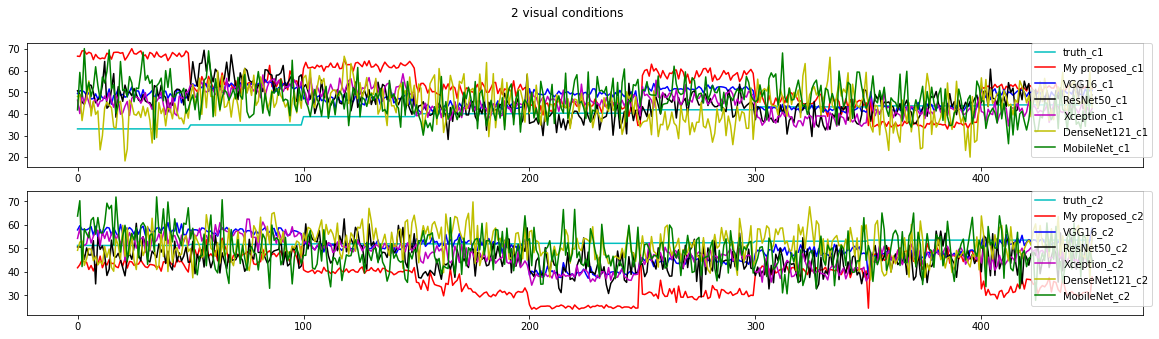

In [ ]:
samples = 450
x_data = range(samples)
# y_data_c1 = test_label[:,0]  
# y_data_c2 = test_label[:,1]
# y_data_c3 = test_label[:,2]

yc1 = np.array(yc1)
yc2 = np.array(yc2)
# yc3 = np.array(yc3)
y1c1 = np.array(y1c1)
y1c2 = np.array(y1c2)
# y1c3 = np.array(y1c3)
y2c1 = np.array(y2c1)
y2c2 = np.array(y2c2)
# y2c3 = np.array(y2c3)
y3c1 = np.array(y3c1)
y3c2 = np.array(y3c2)
# y3c3 = np.array(y3c3)
y4c1 = np.array(y4c1)
y4c2 = np.array(y4c2)
# y4c3 = np.array(y4c3)
y5c1 = np.array(y5c1)
y5c2 = np.array(y5c2)
# y5c3 = np.array(y5c3)

# y_predict_c1 = m[:,0]
# y_predict_c2 = m[:,1]
# y_predict_c3 = m[:,2]
# y_predict1_c1 = m1[:,0]
# y_predict1_c2 = m1[:,1]
# y_predict1_c3 = m1[:,2]
# y_predict2_c1 = m2[:,0]
# y_predict2_c2 = m2[:,1]
# y_predict2_c3 = m2[:,2]
# y_predict3_c1 = m3[:,0]
# y_predict3_c2 = m3[:,1]
# y_predict3_c3 = m3[:,2]
# y_predict4_c1 = m4[:,0]
# y_predict4_c2 = m4[:,1]
# y_predict4_c3 = m4[:,2]
# y_predict5_c1 = m5[:,0]
# y_predict5_c2 = m5[:,1]
# y_predict5_c3 = m5[:,2]

fig, (predict_c1, predict_c2) = plt.subplots(2,figsize=(20,5))
fig.suptitle('2 visual conditions')


predict_c1.plot(x_data, c1[:samples] , 'c', label='truth_c1')
predict_c2.plot(x_data, c2[:samples] , 'c', label='truth_c2')
# predict_c3.plot(x_data, c3 , 'c', label='truth_c3')
predict_c1.plot(x_data, yc1[:samples,0] , 'r', label='My proposed_c1')
predict_c2.plot(x_data, yc2[:samples,0], 'r', label='My proposed_c2')
# predict_c3.plot(x_data, yc3[:,0], 'r', label='predict_c3')
predict_c1.plot(x_data, y1c1[:samples,0] , 'b', label='VGG16_c1')
predict_c2.plot(x_data, y1c2[:samples,0] , 'b', label='VGG16_c2')
# predict_c3.plot(x_data, y1c3[:,0] , 'b', label='predict1_c3')
predict_c1.plot(x_data, y2c1[:samples,0] , 'k', label='ResNet50_c1')
predict_c2.plot(x_data, y2c2[:samples,0] , 'k', label='ResNet50_c2')
# predict_c3.plot(x_data, y2c3[:,0] , 'k', label='predict2_c3')
predict_c1.plot(x_data, y3c1[:samples,0] , 'm', label='Xception_c1')
predict_c2.plot(x_data, y3c2[:samples,0] , 'm', label='Xception_c2')
# predict_c3.plot(x_data, y3c3[:,0] , 'm', label='predict3_c3')
predict_c1.plot(x_data, y4c1[:samples,0] , 'y', label='DenseNet121_c1')
predict_c2.plot(x_data, y4c2[:samples,0] , 'y', label='DenseNet121_c2')
# predict_c3.plot(x_data, y4c3[:,0] , 'y', label='predict4_c3')
predict_c1.plot(x_data, y5c1[:samples,0] , 'g', label='MobileNet_c1')
predict_c2.plot(x_data, y5c2[:samples,0] , 'g', label='MobileNet_c2')
# predict_c3.plot(x_data, y5c3[:,0] , 'g', label='predict5_c3')


predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
# predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# plt.plot(x_data, y_data_c1 , 'c', label='c1')
# plt.plot(x_data, y_data_c2 , 'r', label='c2')
# plt.plot(x_data, y_data_c3 , 'b', label='c3')
# plt.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# plt.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# plt.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# plt.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# plt.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# plt.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# plt.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# plt.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# plt.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

# plt.legend(loc="upper right",fontsize = 'small',bbox_to_anchor=(0.5, -0.05))



# 
fig.savefig('/content/drive/My Drive/222222_wo.png' ,dpi=800)

In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0] 
  y_data_c2 = test_label[:,1] 
  # y_data_c3 = test_label[:,2] 
  y_predict1_c1 = predict[:,0]/100
  y_predict1_c2 = predict[:,1]/100
  # y_predict1_c3 = predict[:,2]/100
  tmp1 = 0
  tmp2 = 0
  # tmp3 = 0
  for i in range(900):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    # tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1/900
  c2 = tmp2/900
  # c3 = tmp3/900
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1, c2


In [ ]:
Model = calculate_mse(m)
Model1 = calculate_mse(m1)
Model2 = calculate_mse(m2)
Model3 = calculate_mse(m3)
Model4 = calculate_mse(m4)
Model5 = calculate_mse(m5)
print(Model)
print(Model1)
print(Model2)
print(Model3)
print(Model4)
print(Model5)

(0.029099316610645312, 0.04103815036646819)
(0.007828096840408076, 0.007808124957348473)
(0.008478164341184298, 0.01408359073363868)
(0.00642479640356437, 0.009987149061102315)
(0.008091170958400512, 0.00777622325138939)
(0.009062269871027151, 0.013253465635832922)


In [ ]:
r = r2_score(test_label, m/100, multioutput='raw_values')
r1 = r2_score(test_label, m1/100, multioutput='raw_values')
r2 = r2_score(test_label, m2/100, multioutput='raw_values')
r3 = r2_score(test_label, m3/100, multioutput='raw_values')
r4 = r2_score(test_label, m4/100, multioutput='raw_values')
r5 = r2_score(test_label, m5/100, multioutput='raw_values')

In [ ]:
print(r)
print(r1)
print(r2)
print(r3)
print(r4)
print(r5)

[-12.64043325 -18.23681433]
[-2.66945499 -2.66009308]
[-2.974177   -5.60174539]
[-2.0116517  -3.68152025]
[-2.79277214 -2.64513901]
[-3.24797905 -5.21262058]


# 以下不要动

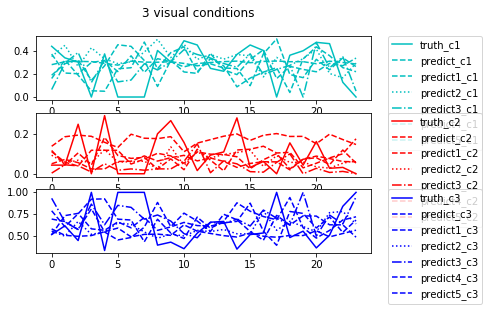

In [ ]:
x_data = range(24)
y_data_c1 = test_label[:,0]  
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]

y_predict_c1 = m[:,0]
y_predict_c2 = m[:,1]
y_predict_c3 = m[:,2]
y_predict1_c1 = m1[:,0]
y_predict1_c2 = m1[:,1]
y_predict1_c3 = m1[:,2]
y_predict2_c1 = m2[:,0]
y_predict2_c2 = m2[:,1]
y_predict2_c3 = m2[:,2]
y_predict3_c1 = m3[:,0]
y_predict3_c2 = m3[:,1]
y_predict3_c3 = m3[:,2]
y_predict4_c1 = m4[:,0]
y_predict4_c2 = m4[:,1]
y_predict4_c3 = m4[:,2]
y_predict5_c1 = m5[:,0]
y_predict5_c2 = m5[:,1]
y_predict5_c3 = m5[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions')


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict_c1 , 'c--', label='predict_c1')
predict_c2.plot(x_data, y_predict_c2 , 'r--', label='predict_c2')
predict_c3.plot(x_data, y_predict_c3 , 'b--', label='predict_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')
predict_c1.plot(x_data, y_predict4_c1 , 'c--', label='predict4_c1')
predict_c2.plot(x_data, y_predict4_c2 , 'r--', label='predict4_c2')
predict_c3.plot(x_data, y_predict4_c3 , 'b--', label='predict4_c3')
predict_c1.plot(x_data, y_predict5_c1 , 'c--', label='predict5_c1')
predict_c2.plot(x_data, y_predict5_c2 , 'r--', label='predict5_c2')
predict_c3.plot(x_data, y_predict5_c3 , 'b--', label='predict5_c3')


predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# plt.plot(x_data, y_data_c1 , 'c', label='c1')
# plt.plot(x_data, y_data_c2 , 'r', label='c2')
# plt.plot(x_data, y_data_c3 , 'b', label='c3')
# plt.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# plt.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# plt.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# plt.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# plt.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# plt.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# plt.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# plt.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# plt.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

# plt.legend(loc="upper right",fontsize = 'small',bbox_to_anchor=(0.5, -0.05))

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 

In [ ]:
x_data = range(20)
y_data_c1 = test_label[:,0]
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]
y_predict1_c1 = m1[:,0]
y_predict1_c2 = m1[:,1]
y_predict1_c3 = m1[:,2]
y_predict2_c1 = m2[:,0]
y_predict2_c2 = m2[:,1]
y_predict2_c3 = m2[:,2]
y_predict3_c1 = m3[:,0]
y_predict3_c2 = m3[:,1]
y_predict3_c3 = m3[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions')


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# fig.savefig('/content/drive/My Drive/ready_data_6C/input/1.png' ,bbox_inches='tight')


Text(0, 0.5, 'Loss')

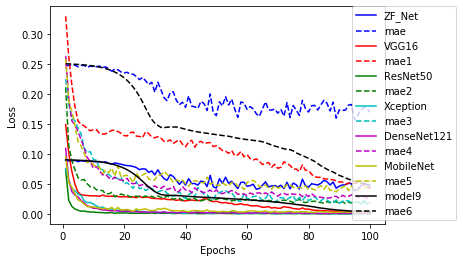

In [ ]:


mse = history.history['loss'] 
mae = history.history['mean_absolute_error']
mse1 = history1.history['loss']
mae1 = history1.history['mean_absolute_error']
mse2 = history2.history['loss']
mae2 = history2.history['mean_absolute_error']
mse3 = history3.history['loss']
mae3 = history3.history['mean_absolute_error']
mse4 = history4.history['loss']
mae4 = history4.history['mean_absolute_error']
mse5 = history5.history['loss']
mae5 = history5.history['mean_absolute_error']

mse6 = history6.history['loss']
mae6 = history6.history['mean_absolute_error']
# mse7 = history7.history['loss']
# mae7 = history7.history['mean_absolute_error']
# mse8 = history8.history['loss']
# mae8 = history8.history['mean_absolute_error']

# model = ZF_Net()
# model1 = VGG16()
# model2 = ResNet50()
# model3 = Xception()
# model4 = DenseNet121()
# model5 = MobileNet()
# model6 = get_model9()

epochs = range(1,len(mse) +1)
plt.plot(epochs, mse, 'b', label='ZF_Net')
plt.plot(epochs, mae, 'b--', label='mae')
plt.plot(epochs, mse1, 'r', label='VGG16')
plt.plot(epochs, mae1, 'r--', label='mae1')
plt.plot(epochs, mse2, 'g', label='ResNet50')
plt.plot(epochs, mae2, 'g--', label='mae2')
plt.plot(epochs, mse3, 'c', label='Xception')
plt.plot(epochs, mae3, 'c--', label='mae3')
plt.plot(epochs, mse4, 'm', label='DenseNet121')
plt.plot(epochs, mae4, 'm--', label='mae4')
plt.plot(epochs, mse5, 'y', label='MobileNet')
plt.plot(epochs, mae5, 'y--', label='mae5')
plt.plot(epochs, mse6, 'k', label='model9')
plt.plot(epochs, mae6, 'k--', label='mae6')
# plt.plot(epochs, mse7, '#9467bd', label='mse7')
# plt.plot(epochs, mae7, '#9467bd',linestyle='dashed', label='mae7')
# plt.plot(epochs, mse8, '#e377c2', label='mse8')
# plt.plot(epochs, mae8, '#e377c2',linestyle='dashed', label='mae8')

plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.show() 
# plt.savefig('/content/drive/My Drive/original(10%kept)_6models.png' ,dpi=2400)